<br><h1 align="Center"> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="60" width="200" align="Center" />MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II</h1>
<h2 align="Center">
Presentado por:<br>
Jaime Orjuela Viracacha - Cód 201924252<br>
Fabián Cholo Acevedo - Cód 201523509<br>
</h2>
<h3 align="Center">Introducción a las redes neuronales

Actividad 2

Profesor: Camilo Franco (c.franco31@uniandes.edu.co) </h3>



En esta actividad vamos a estudiar una primera aproximación a los modelos de redes neuronales, utilizando como base el modelo de regresión logística.


In [2]:
# Algunos paquetes iniciales que vamos a utilizar
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

## 1. Problema de clasificación: riesgo de default

Examinemos los datos con lo cuales ya estamos familiarizados:


https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [3]:
credit_1 = pd.read_csv("germancredit.csv")
credit_1 = pd.get_dummies(credit_1, columns=['checkingstatus1','history','purpose','savings',
                                   'employ','status','others','property','otherplans','housing','job','tele', 
                                   'foreign'], prefix = ['checkingstatus1','history','purpose','savings',
                                   'employ','status','others','property','otherplans','housing','job','tele', 
                                   'foreign'])
X = credit_1.iloc[:, 1:62]
Y = credit_1.iloc[:, 0]


In [4]:
CE_x, CP_x, CE_y, CP_y = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)
print("Tamaño de CE, CP: ", CE_y.shape, CP_y.shape)
print("Observaciones de la clase positiva en entrenamiento: " +str(sum(CE_y)) +" y en prueba: " +str(sum(CP_y)))

Tamaño de CE, CP:  (600,) (400,)
Observaciones de la clase positiva en entrenamiento: 180 y en prueba: 120


## 2. Construcción de una neurona Sigmoide

Una neurona Sigmoide puede ser vista como un perceptrón *suavizado* que recibe una señal y entonces se activa. Al activarse, transforma la señal para entender mejor el mensaje. Esta transformación la ejecuta a partir de la función Sigmoide.

Si tomamos la señal como un conjunto de datos de entrada y el mensaje como la predicción de un valor, la función de activación jugará el papel de transformadora de los datos de entrada en aquello que se quiere entender/predecir, que además replica un modelo logit con la función de activación sigmoide.

A continuación construiremos un clasificador de regresión logística bajo la perspectiva de una red neuronal, estudiando la arquitectura general de un algoritmo de aprendizaje. De esta manera, necesitaremos incluir la inicialización de los parámetros, el cálculo de la función de coste y su gradiente, y utilizar un algoritmo de optimización como por ejemplo el descenso en la dirección del gradiente (GD)

**Formulación del algoritmo**:

Para un ejemplo $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoide(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

El coste se calcula sumando sobre todos los ejemplos de entrenamiento:
$$ L = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$



### Construimos las partes del algoritmo  

- Inicializar los parámetros del modelo
- Bucle:
    - Calcular la pérdida actual (propagación hacia delante)
    - Calcular el gradiente actual (retro-propagación)
    - Actualizar los parámetros (descenso en la dirección del gradiente)


### Ejercicio 2.1
Implemente la funcion `sigmoide()` $$\sigma( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$ Para ello puede utilizar np.exp().

In [5]:
def sigmoide(z):
    """
    Input:
    z: Un escalar o arreglo numpy de cualquier tamaño
    Output:
    s: sigmoid(z)
    """

    s = 1/(1+np.exp(-z))
    
    return s

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/logistic_function.png" width="65%" />

_(Source: Python Machine Learning, S. Raschka)_

In [6]:
print ("sigmoide([99,1,0,-1,-99]) = " + str(sigmoide(np.array([99,1,0,-1,-99]))))

sigmoide([99,1,0,-1,-99]) = [1.00000000e+00 7.31058579e-01 5.00000000e-01 2.68941421e-01
 1.01122149e-43]


**Salida esperada**: 

<table>
<tr>
<td> sigmoide([99,1,0,-1,-99])    = </td>
<td> [ 1.00000000e+00 7.31058579e-01 5.00000000e-01 2.68941421e-01
 1.01122149e-43] </td> 
</tr>
</table>

### Ejercicio 2.2 

Debemos inicializar los parámetros a cero. Puede utilizar la funcion np.zeros(), apoyandose en la documentación de la biblioteca Numpy.

In [7]:
def inicializa_ceros(dim):
    """
    Esta función crea un vector de ceros de dimensión (dim, 1) para w e inicializa b a 0.
    Input:
    dim: tamaño del vector w (número de parámetros para este caso)
    Output:
    w: vector inicializado de tamaño (dim, 1)
    b: escalar inicializado (corresponde con el sesgo)
    """
    
    w = np.zeros(shape=(dim,1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [8]:
dim = 6
w, b = inicializa_ceros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
b = 0


**Salida esperada**: 


<table style="width:35%">
<tr>
<td>   w   </td>
<td> [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] </td>
</tr>
<tr>
<td>   b   </td>
<td> 0 </td>
</tr>
</table>

### Ejercicio 2.3 
#### Propagación hacia delante y hacia atrás

Una vez los estimadores están inicializados, se pueden implementar los pasos de propagación hacia "delante" y hacia "atrás" para el aprendizaje automático. 

La propagación hacia delante consiste en calcular la función de activación sigmoide sobre la combinacón lineal de los patrones y los coeficientes inciales. 

Luego la propagación hacia atrás, o *retro-propagación*, es el paso más importante, donde utilizamos el gradiente de la función del error o de pérdida para actualizar los coeficientes. 

Este procedimiento se repite iterativamente replicando el procediemiento de descenso en la dirección del gradiente o *Gradient Descent* (GD).

A continuación implemente la función `propaga()` que calcula la función de coste y su gradiente.

**Ayuda**:

Propagación hacia delante:
- Se tiene $X$
- Se calcula $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Se calcula la función de coste/pérdida: $L = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Para la retro-propagación, tenemos que calcular la derivada parcial de *L* con respecto a nuestros coeficientes $(w,b)$:  

$$ \frac{\partial L}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{5}$$
$$ \frac{\partial L}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{6}$$

*Nota:* Para el cálculo de estas derivadas debemos hacer uso de la regla de la cadena. 

Esto es, dado $Z=w^T X + b$, se tiene que $$\frac{\partial L}{\partial Z} = \frac{\partial L}{\partial A} \frac{\partial A}{\partial Z} = \bigg(\frac{-Y}{A}+\frac{1-Y}{1-A}\bigg) (A \cdot (1-A)) $$


In [9]:
def propaga(w, b, X, Y):
    """
    Implemente la función de coste y su gradiente para la propagación
    Input:
    w: pesos, un arreglo numpy 
    b: sesgo, un escalar
    X: datos de entrada
    Y: vector de etiquetas 
    Output:
    coste: coste negativo de log-verosimilitud para la regresión logística
    dw: gradiente de la pérdida con respecto a w, con las mismas dimensiones que w
    db: gradiente de la pérdida con respecto a b, con las mismas dimensiones que b
    
    (Sugerencia: utilice las funciones np.log(), np.dot()
    """
    
    m = X.shape[1]
    # A: Activación (w traspuesto * X + b)
    A = sigmoide(np.dot(w.T,X)+b)
    
    # Se calcula el costo en dos etapas: 
    # 1. El interior de la sumatoria
    # 2. La sumatoria
    logs = np.multiply(Y,np.log(A)) + np.multiply((1 - Y),np.log(1 - A))
    coste = -1/m * np.sum(logs)    

    # dw: gradiente de la pérdida con respecto a w, con las mismas dimensiones que w
    # db: gradiente de la pérdida con respecto a b, con las mismas dimensiones que b
    dw = 1/m * np.dot(X,(A-Y).T) 
    db = 1/m * np.sum(A-Y,keepdims=True)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    coste = np.squeeze(coste)
    assert(coste.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, coste


In [10]:
w, b, X, Y = np.array([[0.1],[0.1]]), 0.5, np.array([[66.,99.,-33.],[32.,55.,-2.1]]), np.array([[0,0,1]])
grads, coste = propaga(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("coste = " + str(coste))

dw = [[65.48251839]
 [29.66675568]]
db = [[0.3489808]]
coste = 9.752716367426284


**Salida esperada**: 

<table style="width:50%">
<tr>
<td>   dw   </td>
<td> [[65.48251839]
 [29.66675568]]</td>
</tr>
<tr>
<td>   db   </td>
<td> 0.348980796447886 </td>
</tr>
<tr>
<td>   cost   </td>
<td> 9.752716367426284 </td>
</tr>
</table>

Los parámetros obtenidos están de acuerdo a la salida espera.

### Ejercicio 2.4 
#### Optimización

- Se tienen los parámetros inicializados.
- También se tiene el código para calcular la función de coste y su gradiente.
- Ahora se quieren actualizar los parámetros utilizando el GD.

Escriba la función de optimización para aprender $w$ y $b$ minimizando la función de coste $L$. 

Para un parámetro $\theta$, la regla de actualización es $ \theta = \theta - \alpha \text{ } d\theta$, donde $\alpha$ es la tasa de aprendizaje.

In [11]:
def optimiza(w, b, X, Y, num_iter, tasa, print_cost):
    """
    Esta función optimiza w y b implementando el algoritmo de GD
    Entradas:
    w: pesos, un arreglo numpy 
    b: sesgo, un escalar
    X: datos de entrada
    Y: vector de etiquetas 
    num_iter: número de iteracionespara el bucle de optimización
    tasa: tasa de aprendizaje para la regla de actualización del GD
    print_cost: True para imprimir la pérdida cada 100 iteraciones
    Salidas:
    params: diccionario con los pesos w y el sesgo b
    grads: diccionario con los gradientes de los pesos y el sesgo con respecto a la función de pérdida
    costes: lista de todos los costes calculados durante la optimización, usados para graficar la curva de aprendizaje.
    
    Sugerencia: puede escribir dos pasos e iterar sobre ellos:
        1) Calcule el coste y el gradiente de los parámetros actuales. Use propaga().
        2) Actualize los parámetros usando la regla del GD para w y b.
    """
    
    costes = []
    
    for i in range(num_iter):
        
        
        # Computación del coste y el gradiente 
        grads, coste = propaga(w,b,X,Y)
        
        # Recupere las derivadas de grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Actualize la regla 
        w = w - tasa * dw
        b = b - tasa * db
        
        # Guarde los costes
        if i % 100 == 0:
            costes.append(coste)
        
        # Se muestra el coste cada 100 iteraciones de entrenamiento
        if print_cost and i % 100 == 0:
            print ("Coste tras la iteración %i: %f" %(i, coste))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costes

In [12]:
params, grads, costes = optimiza(w, b, X, Y, num_iter= 10, tasa = 0.001, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[-0.07262234]
 [ 0.02112647]]
b = [[0.49898149]]
dw = [[1.42076721]
 [0.43496446]]
db = [[-0.00782166]]


**Salida esperada**:  

<table style="width:40%">
<tr>
<td> w </td>
<td>[[-0.07262234]
 [ 0.02112647]] </td>
</tr>
<tr>
<td> b </td>
<td> 0.49898148713402446 </td>
</tr>
<tr>
<td> dw </td>
<td> [[1.42076721]
 [0.43496446]] </td>
</tr>
<tr>
<td> db </td>
<td> -0.007821662502973652 </td>
</tr>
</table>

### Ejercicio 2.5

La función anterior aprende los parámetros w y b, que se pueden usar para predecir sobre el conjunto de datos X. 

Hay dos pasos para calcular las predicciones:

1. Calcular $\hat{Y} = A = \sigma(w^T X + b)$

2. Converir a 0 las entradas de $a$ (si la activación es <= 0.5) o 1 (si la activación es > 0.5), guarde las predicciones en un vector `Y_pred`.  

Ahora implemente la función `pred()`. 

In [13]:
def pred(w, b, X):
    '''
    Prediga si una etiqueta es 0 o 1 usando los parámetros de regresión logística aprendidos (w, b)
    Entrada:
    w: pesos, un arreglo numpy 
    b: sesgo, un escalar
    X: datos de entrada
    Salida:
    Y_pred: vector con todas las predicciones (0/1) para los ejemplos en X
    '''
    
    m = X.shape[1]
    Y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Se calcula "A" 
    A = sigmoide(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convierta las probabilidades A[0,i] a predicciones p[0,i]
        Y_pred[0,i] = round(A[0,i],0)
    
    assert(Y_pred.shape == (1, m))
    
    return Y_pred

In [14]:
w = np.array([[0.12],[0.23]])
b = -0.09
X = np.array([[3.1,-2.9,0.2],[1.9,1.8,-0.09]])
print ("predicciones = " + str(pred(w, b, X)))

predicciones = [[1. 0. 0.]]


**Salida esperada**: 

<table style="width:40%">
<tr>
<td> predicciones   </td>
<td>[[ 1.  0.  0.]]  </td>  
</tr>
</table>

### Ejercicio 2.6
#### Combine todas las funciones 

Ahora juntemos todos los bloques que ha programado arriba.

Implemente la función del modelo "madre". Use la siguiente notación:
    - YP_pred para las predicciones sobre el conjunto de prueba
    - YE_pred para las predicciones sobre el conjunto de entrenamiento
    - w, costes, grads para las salidas de optimiza()

In [15]:
CP_x.shape

(400, 61)

In [16]:
def modelo(CE_x, CP_x, CE_y, CP_y, num_iter, tasa, print_cost):
    """
    Construye el modelo de regresión logística llamando las funciones implementadas anteriormente
    Output:
    d: diccionario con la información sobre el modelo.
    """
    
    # Inicialice los parametros con ceros 
    w, b = inicializa_ceros(CE_x.shape[0])

    # Descenso en la dirección del gradiente (GD) 
    params, grads, costes = optimiza(w, b, CE_x, CE_y, num_iter, tasa, print_cost)
    
    # Recupere los parámetros w y b del diccionario "params" ##
    w = params["w"]
    b = params["b"]
    
    # Prediga los ejemplos de prueba y entrenamiento (≈ 2 líneas de código)
    YP_pred = pred(w, b, CP_x)
    YE_pred = pred(w, b, CE_x)

    # Imprima los errores de entrenamiento y prueba
    print("Precisión de entrenamiento: {} %".format(100 - np.mean(np.abs(YE_pred - CE_y)) * 100))
    print("Precisión de prueba: {} %".format(100 - np.mean(np.abs(YP_pred - CP_y)) * 100))

    
    d = {"Costes": costes,
         "Prediccion_prueba": YP_pred, 
         "Prediccion_entrenamiento" : YE_pred, 
         "w" : w, 
         "b" : b,
         "Tasa de aprendizaje" : tasa,
         "Numero de iteraciones": num_iter}
    
    return d

### Pregunta 2.7

De qué dimensiones deben ser las matrices con los datos de entrada y de salida?

In [17]:
# Se hallan las dimensiones de las matrices con los datos de entrada y de salida
CE_x2 = CE_x.T
CP_x2 = CP_x.T
CE_y2 = np.array(CE_y)[np.newaxis]
CP_y2 = np.array(CP_y)[np.newaxis]

print(CE_x2.shape, CE_y2.shape)

(61, 600) (1, 600)


Ahora, ejecute la siguiente celda para entrenar el modelo:

In [18]:
d = modelo(CE_x2, CP_x2, CE_y2, CP_y2, num_iter = 1000, tasa = 1e-6, print_cost = True)

Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 0.678157
Coste tras la iteración 200: 0.677031
Coste tras la iteración 300: 0.675938
Coste tras la iteración 400: 0.674877
Coste tras la iteración 500: 0.673846
Coste tras la iteración 600: 0.672844
Coste tras la iteración 700: 0.671871
Coste tras la iteración 800: 0.670925
Coste tras la iteración 900: 0.670005
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %


**Salida esperada**: 

<table style="width:50%"> 
<tr>
<td> Coste tras la iteración 0   </td> 
<td> 0.693147 </td>
</tr>
<tr>
<td> <center> $\vdots$ </center> </td> 
<td> <center> $\vdots$ </center> </td> 
</tr>  
<tr>
<td> Precisión de entrenamiento  </td> 
<td> 70.0 % </td>
</tr>
<tr>
<td> Precisión de prueba </td> 
<td> 70.0 % </td>
</tr>
</table> 

La precisión de entrenamiento es muy similar a la que conseguimos mediante la regresion logistica. También podemos observar que el error de prueba es igual al de entrenamiento. Este resultado sugiere que el modelo aprende segun entrenamiento, y generaliza de igual forma sobre los observaciones nuevas.

Grafiquemos la función de pérdida.

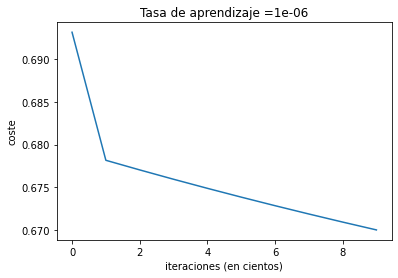

In [19]:
# Gráfica de la curva de aprendizaje (con costes)
costes = np.squeeze(d['Costes'])
plt.plot(costes)
plt.ylabel('coste')
plt.xlabel('iteraciones (en cientos)')
plt.title("Tasa de aprendizaje =" + str(d["Tasa de aprendizaje"]))
plt.show()

**Interpretación**:
Se puede ver el coste decreciendo, demostrando que los parámetros están siendo aprendidos. 

Ya tenemos un primer modelo de clasificación. Ahora examinemos distintos valores para la tasa de aprendizaje $\alpha$. 

#### Selección de la tasa de aprendizaje ####

Para que el método del GD funcione de manera adecuada, se debe elegir la tasa de aprendiazaje de manera acertada. Esta tasa $\alpha$  determina qué tan rápido se actualizan los parámetros. Si la tasa es muy grande se puede "sobrepasar" el valor óptimo. Y de manera similar, si es muy pequeña se van a necesitar muchas iteraciones para converger a los mejores valores. Por ello la importancia de tener una tasa de aprendizaje bien definida.  

Ahora, comparemos la curva de aprendizaje de nuestro modelo con distintas elecciones para $\alpha$. Ejecute el código abajo. También puede intentar con valores distintos a los tres que estamos utilizando abajo para `tasas` y analize los resultados.



La tasa de aprendizaje es: 0.0001


<ipython-input-4-bd0ffb3a48e4>:9: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))
<ipython-input-8-07deeef0e3d8>:24: RuntimeWarning: divide by zero encountered in log
  logs = np.multiply(Y,np.log(A)) + np.multiply((1 - Y),np.log(1 - A))
<ipython-input-8-07deeef0e3d8>:24: RuntimeWarning: invalid value encountered in multiply
  logs = np.multiply(Y,np.log(A)) + np.multiply((1 - Y),np.log(1 - A))


Precisión de entrenamiento: 33.0 %
Precisión de prueba: 32.75 %

-------------------------------------------------------

La tasa de aprendizaje es: 1.04e-06
Precisión de entrenamiento: 70.16666666666666 %
Precisión de prueba: 72.5 %

-------------------------------------------------------

La tasa de aprendizaje es: 1e-06
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %

-------------------------------------------------------

La tasa de aprendizaje es: 1e-10
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %

-------------------------------------------------------

La tasa de aprendizaje es: 2e-20
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %

-------------------------------------------------------



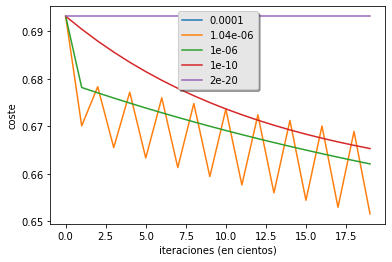

In [20]:
tasas = [1e-4, 1.04e-6, 1e-6, 1e-10, 2e-20]
modelos = {}
for i in tasas:
    print ("La tasa de aprendizaje es: " + str(i))
    modelos[str(i)] = modelo(CE_x2, CP_x2, CE_y2, CP_y2, num_iter = 2000, tasa = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in tasas:
    plt.plot(np.squeeze(modelos[str(i)]["Costes"]), label= str(modelos[str(i)]["Tasa de aprendizaje"]))

plt.ylabel('coste')
plt.xlabel('iteraciones (en cientos)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

#### Comentarios acerca de la tasa de aprendizaje

Los pesos de cada neurona para el algoritmo GD **gradient descent**, donde el error de cada neurona está relacionado con su peso. La regla para actualizar el parámetro es: $ \theta = \theta - \alpha \text{ } d\theta$ donde $\alpha$ es la tasa de aprendizaje $\theta$.

<img src='https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/updateParameters.png'>

Con una tasa de muy baja (en nuestro caso $1*10^{20}$), se requieren muchas iteraciones antes de alcanzar el punto mínimo; mientras que una tasa de aprendizaje muy alta (en nuestro caso $1*10^{4}$), causas actualizaciones muy drásticas en los pesos lo que conlleva a comportamientos erráticos .  En contraposición una buena tasa de aprendizaje (en nuestro caso $1*10^{6}$) optimiza el tiempo de cómputo, así como la precisión de la red neuronal. Imágenes tomadas de <a href="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/updateParameters.png">Repositorio git hub de Alejandro Correa</a>.

### Pregunta 2.8

Analice los resultados, con cuál tasa de aprendizaje intentaría mejorar el desempeño del modelo?

R/ Valores entre $1.04*10^6$ y $1*10^6$ se podría encontrar el máximo absoluto. 

## 3. Comparacion con la implementación tradicional de regresión logística

A continuación ajustamos el modelo logístico y lo probamos:

In [28]:
logT = LogisticRegression(penalty='none', max_iter=1500)
logT.fit(CE_x, CE_y)
y_tr = logT.predict(CE_x)
y_pred = logT.predict(CP_x)
logT_coef = logT.coef_

Examinemos los coeficientes del modelo de la neurona sigmoide y su desviación con respecto a la estimación tradicional de regresion logistica.

In [32]:
from astropy.table import QTable, Table, Column

Tabla =  Table([logT_coef.T, d['w'], CE_x.T], names=("Regresion logistica", "Neurona sigmoide", "Diferencia"))
Tabla

Regresion logistica [1],Neurona sigmoide [1],Diferencia [600]
float64,float64,int64
0.0228025923589621,-6.293083905403859e-05,18 .. 15
7.431426568141854e-05,-1.631136907400603e-05,12976 .. 3029
0.24834399085865466,-0.00015135061139790666,3 .. 2
0.05379887762733803,-0.00016794413611101247,4 .. 2
-0.009715877848817596,-0.0023681544427456127,38 .. 33
0.08401499725551834,-8.574184624564529e-05,1 .. 1
0.02925479496657787,-6.586234732681293e-05,1 .. 1
0.5398583553972339,2.9167410750735905e-05,0 .. 0
0.1388022989118418,8.429711287300682e-06,1 .. 0


### Pregunta 3.1

Qué puede observar en esta comparativa?

Se nota diferencia entre las unidades de la estimación. 

Veamos la exactitud de los modelos

In [33]:
print("La neurona sigmoide tiene una exactitud de entrenamiento: " 
      +str(float((d['Prediccion_entrenamiento'] == CE_y2).mean())) +" y de validacion: " +str(float((d['Prediccion_prueba'] == CP_y2).mean())))
print("La regresion tradicional tiene una exactitud de entrenamiento: " 
      +str(float((y_tr == CE_y).mean())) +" y de validacion: " +str(float((y_pred == CP_y).mean())))


La neurona sigmoide tiene una exactitud de entrenamiento: 0.7 y de validacion: 0.7
La regresion tradicional tiene una exactitud de entrenamiento: 0.77 y de validacion: 0.76


### Ejercicio  3.2

Ahora puede desarrollar su propio código intentando mejorar los resultados obtenidos. 

Intente sobrepasar los resultados de la regresion logistica tradicional. Optimice la tasa de aprendizaje, el número de iteraciones o (bono) investigue y cambie la manera en la cual inicializamos los coeficientes. 

In [41]:
for i in range(10,1000,10):
    print("*** tasa = " + str(i) + " ***" )
    d = modelo(CE_x2, CP_x2, CE_y2, CP_y2, num_iter = 1000, tasa = 1/(i*1000), print_cost = True)

*** tasa = 10 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: nan
Coste tras la iteración 200: nan
Coste tras la iteración 300: nan
Coste tras la iteración 400: nan
Coste tras la iteración 500: nan
Coste tras la iteración 600: nan
Coste tras la iteración 700: nan
Coste tras la iteración 800: nan


<ipython-input-4-bd0ffb3a48e4>:9: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))
<ipython-input-8-07deeef0e3d8>:24: RuntimeWarning: divide by zero encountered in log
  logs = np.multiply(Y,np.log(A)) + np.multiply((1 - Y),np.log(1 - A))
<ipython-input-8-07deeef0e3d8>:24: RuntimeWarning: invalid value encountered in multiply
  logs = np.multiply(Y,np.log(A)) + np.multiply((1 - Y),np.log(1 - A))


Coste tras la iteración 900: nan
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %
*** tasa = 20 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: nan
Coste tras la iteración 200: inf
Coste tras la iteración 300: nan
Coste tras la iteración 400: nan
Coste tras la iteración 500: nan
Coste tras la iteración 600: nan
Coste tras la iteración 700: nan
Coste tras la iteración 800: nan
Coste tras la iteración 900: nan
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %
*** tasa = 30 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 32.965270
Coste tras la iteración 200: inf
Coste tras la iteración 300: nan
Coste tras la iteración 400: 32.749237
Coste tras la iteración 500: inf
Coste tras la iteración 600: nan
Coste tras la iteración 700: 32.515398
Coste tras la iteración 800: nan
Coste tras la iteración 900: nan
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %
*** tasa = 40 ***
Coste tras la iteración 0: 0.693147
Cost

Coste tras la iteración 200: 4.140236
Coste tras la iteración 300: 8.508383
Coste tras la iteración 400: 3.214449
Coste tras la iteración 500: 4.197113
Coste tras la iteración 600: 8.477691
Coste tras la iteración 700: 3.183371
Coste tras la iteración 800: 4.254303
Coste tras la iteración 900: 8.446810
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %
*** tasa = 210 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 3.038375
Coste tras la iteración 200: 4.033480
Coste tras la iteración 300: 8.046935
Coste tras la iteración 400: 3.009310
Coste tras la iteración 500: 4.086816
Coste tras la iteración 600: 8.018154
Coste tras la iteración 700: 2.980134
Coste tras la iteración 800: 4.140308
Coste tras la iteración 900: 7.989244
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %
*** tasa = 220 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 2.855501
Coste tras la iteración 200: 3.924227
Coste tras la iteración 300: 7.632249
Cost

Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 1.458479
Coste tras la iteración 200: 2.449427
Coste tras la iteración 300: 4.142550
Coste tras la iteración 400: 1.447210
Coste tras la iteración 500: 2.467845
Coste tras la iteración 600: 4.132259
Coste tras la iteración 700: 1.436086
Coste tras la iteración 800: 2.485920
Coste tras la iteración 900: 4.122062
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %
*** tasa = 390 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 1.415733
Coste tras la iteración 200: 2.382538
Coste tras la iteración 300: 4.023217
Coste tras la iteración 400: 1.404981
Coste tras la iteración 500: 2.399932
Coste tras la iteración 600: 4.013474
Coste tras la iteración 700: 1.394372
Coste tras la iteración 800: 2.416988
Coste tras la iteración 900: 4.003821
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %
*** tasa = 400 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 1.375484
Coste 

Coste tras la iteración 100: 0.948599
Coste tras la iteración 200: 1.547347
Coste tras la iteración 300: 2.632083
Coste tras la iteración 400: 0.943217
Coste tras la iteración 500: 1.553883
Coste tras la iteración 600: 2.628300
Coste tras la iteración 700: 0.937930
Coste tras la iteración 800: 1.560168
Coste tras la iteración 900: 2.624514
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %
*** tasa = 570 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 0.930498
Coste tras la iteración 200: 1.510491
Coste tras la iteración 300: 2.573989
Coste tras la iteración 400: 0.925310
Coste tras la iteración 500: 1.516612
Coste tras la iteración 600: 2.570443
Coste tras la iteración 700: 0.920213
Coste tras la iteración 800: 1.522485
Coste tras la iteración 900: 2.566887
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %
*** tasa = 580 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 0.912990
Coste tras la iteración 200: 1.474429
Cost

Coste tras la iteración 400: 1.512886
Coste tras la iteración 500: 0.892604
Coste tras la iteración 600: 1.773365
Coste tras la iteración 700: 0.869941
Coste tras la iteración 800: 1.262979
Coste tras la iteración 900: 0.766680
Precisión de entrenamiento: 32.16666666666667 %
Precisión de prueba: 32.0 %
*** tasa = 750 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 0.673273
Coste tras la iteración 200: 0.690584
Coste tras la iteración 300: 1.687366
Coste tras la iteración 400: 1.563592
Coste tras la iteración 500: 0.992221
Coste tras la iteración 600: 0.665556
Coste tras la iteración 700: 0.671949
Coste tras la iteración 800: 1.446725
Coste tras la iteración 900: 0.668715
Precisión de entrenamiento: 30.33333333333333 %
Precisión de prueba: 31.25 %
*** tasa = 760 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 0.871643
Coste tras la iteración 200: 0.654046
Coste tras la iteración 300: 0.814106
Coste tras la iteración 400: 0.712181
Coste tras la i

Coste tras la iteración 300: 0.686265
Coste tras la iteración 400: 0.710068
Coste tras la iteración 500: 0.742801
Coste tras la iteración 600: 0.751335
Coste tras la iteración 700: 0.779104
Coste tras la iteración 800: 0.699962
Coste tras la iteración 900: 0.652370
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %
*** tasa = 930 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 0.702038
Coste tras la iteración 200: 0.712238
Coste tras la iteración 300: 0.682606
Coste tras la iteración 400: 0.670108
Coste tras la iteración 500: 0.674948
Coste tras la iteración 600: 0.661175
Coste tras la iteración 700: 0.664353
Coste tras la iteración 800: 0.701737
Coste tras la iteración 900: 0.715934
Precisión de entrenamiento: 70.0 %
Precisión de prueba: 70.0 %
*** tasa = 940 ***
Coste tras la iteración 0: 0.693147
Coste tras la iteración 100: 0.662979
Coste tras la iteración 200: 0.670762
Coste tras la iteración 300: 0.660558
Coste tras la iteración 400: 0.666804
Cost

Dado que la red neuronal se contruyó con sólo una neurona, la regresión logística tradicional supera a la red neuronal, no obstante, si se buscaran otras configuraciones para la red neuronal, como aumentar el número de neuronas y adicionar capas ocultas, sería posible encuentrar mejores resultados. 